# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 37kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Extracting mnist: 100%|██████████| 60.0K/60.0K [00:13<00:00, 4.35KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

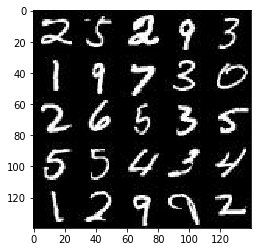

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

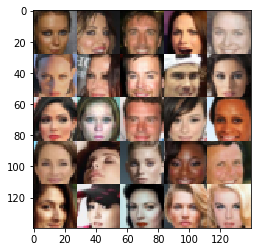

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels), name='real_input')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name = 'z_input')
    learning_rate = tf.placeholder(tf.float32, name = 'learning_rate')
    

    return real_inputs, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        
        
        flat = tf.reshape(x3, (-1,4*4*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        
    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha = .1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z,7*7*256)
        x1 = tf.reshape(x1,(-1,7,7,256))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha*x1,x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2,x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha*x3,x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha =.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha = alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels= tf.ones_like(d_logits_real)*.8 ))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_model_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_model_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """

    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-.5, .5, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=.2)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1,1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0990... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.1296... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0221... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.7035... Generator Loss: 0.6632
Epoch 1/2... Discriminator Loss: 1.0229... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0227... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0208... Generator Loss: 0.6931


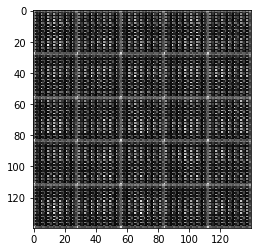

Epoch 1/2... Discriminator Loss: 1.0254... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0314... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0198... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0227... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931


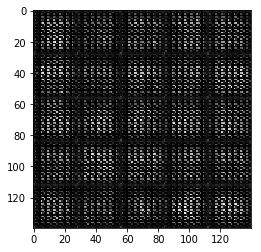

Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0242... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0221... Generator Loss: 0.6898
Epoch 1/2... Discriminator Loss: 1.0441... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.5745... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0230... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0192... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.6929


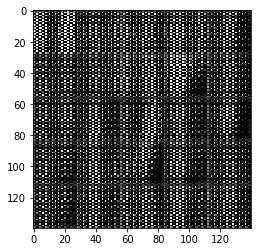

Epoch 1/2... Discriminator Loss: 1.0240... Generator Loss: 0.6881
Epoch 1/2... Discriminator Loss: 1.0245... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0198... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0206... Generator Loss: 0.6922
Epoch 1/2... Discriminator Loss: 1.0204... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931


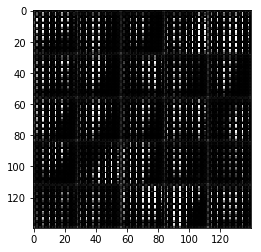

Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0192... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0253... Generator Loss: 0.6867
Epoch 1/2... Discriminator Loss: 1.0285... Generator Loss: 0.6859


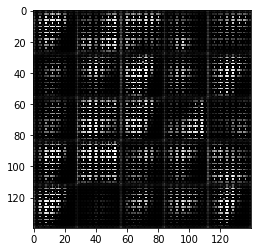

Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6929
Epoch 1/2... Discriminator Loss: 1.0210... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0192... Generator Loss: 0.6931


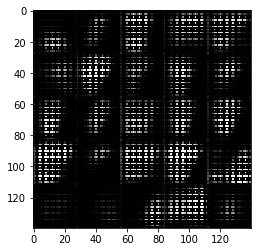

Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6930


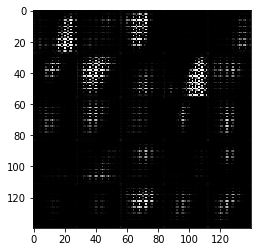

Epoch 1/2... Discriminator Loss: 1.0197... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931


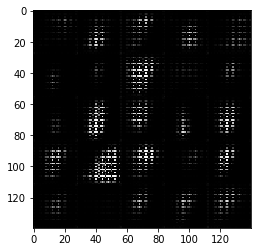

Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0198... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.6930


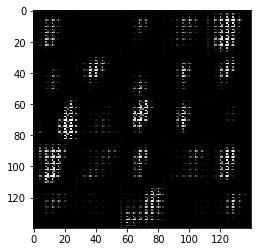

Epoch 1/2... Discriminator Loss: 1.0195... Generator Loss: 0.6921
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6929
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0203... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0198... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0192... Generator Loss: 0.6931


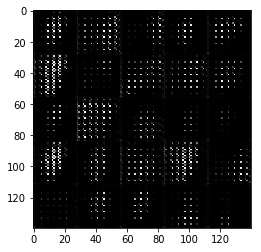

Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0195... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 0.6931


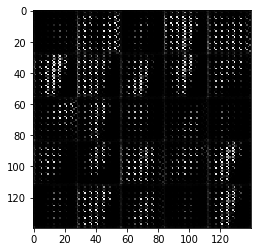

Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0208... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0195... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931


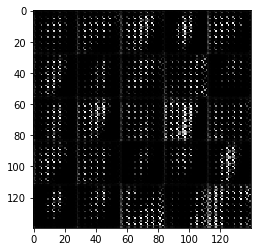

Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0210... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0214... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0208... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931


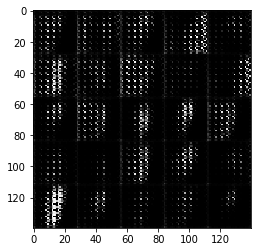

Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0189... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0213... Generator Loss: 0.6931


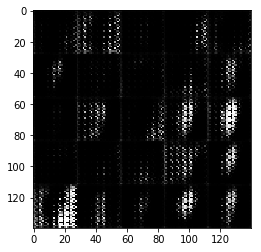

Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0224... Generator Loss: 0.6896
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0253... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0236... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0204... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931


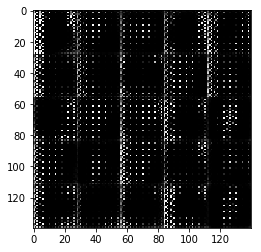

Epoch 1/2... Discriminator Loss: 1.0203... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0201... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0185... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0201... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0192... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0191... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0213... Generator Loss: 0.6931


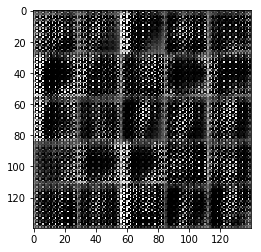

Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0229... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0187... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.3663... Generator Loss: 0.5627


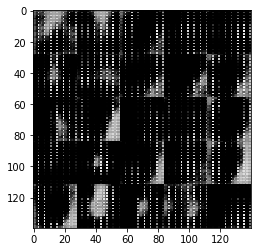

Epoch 1/2... Discriminator Loss: 1.3921... Generator Loss: 0.4816
Epoch 1/2... Discriminator Loss: 1.7446... Generator Loss: 0.3173
Epoch 1/2... Discriminator Loss: 1.5927... Generator Loss: 0.3391
Epoch 1/2... Discriminator Loss: 2.0322... Generator Loss: 0.3139
Epoch 1/2... Discriminator Loss: 1.5948... Generator Loss: 0.3325
Epoch 1/2... Discriminator Loss: 1.5400... Generator Loss: 0.3604
Epoch 1/2... Discriminator Loss: 1.5107... Generator Loss: 0.4506
Epoch 1/2... Discriminator Loss: 1.5603... Generator Loss: 0.3872
Epoch 1/2... Discriminator Loss: 1.7140... Generator Loss: 0.3202
Epoch 1/2... Discriminator Loss: 1.5528... Generator Loss: 0.3761


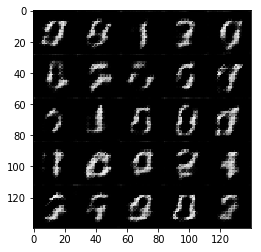

Epoch 1/2... Discriminator Loss: 1.4850... Generator Loss: 0.3906
Epoch 1/2... Discriminator Loss: 1.5272... Generator Loss: 0.3679
Epoch 1/2... Discriminator Loss: 1.5291... Generator Loss: 0.4022
Epoch 1/2... Discriminator Loss: 1.5397... Generator Loss: 0.3874
Epoch 1/2... Discriminator Loss: 1.5355... Generator Loss: 0.3861
Epoch 1/2... Discriminator Loss: 1.5331... Generator Loss: 0.3723
Epoch 1/2... Discriminator Loss: 1.5811... Generator Loss: 0.4039
Epoch 2/2... Discriminator Loss: 1.5227... Generator Loss: 0.4091
Epoch 2/2... Discriminator Loss: 1.5542... Generator Loss: 0.3517
Epoch 2/2... Discriminator Loss: 1.5298... Generator Loss: 0.3700


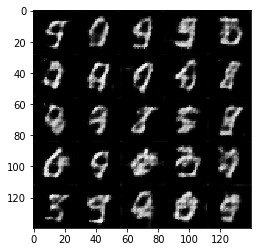

Epoch 2/2... Discriminator Loss: 1.5802... Generator Loss: 0.4205
Epoch 2/2... Discriminator Loss: 1.5431... Generator Loss: 0.3533
Epoch 2/2... Discriminator Loss: 1.5296... Generator Loss: 0.3640
Epoch 2/2... Discriminator Loss: 1.5104... Generator Loss: 0.3818
Epoch 2/2... Discriminator Loss: 1.5404... Generator Loss: 0.3716
Epoch 2/2... Discriminator Loss: 1.5065... Generator Loss: 0.4052
Epoch 2/2... Discriminator Loss: 1.5350... Generator Loss: 0.3666
Epoch 2/2... Discriminator Loss: 1.5527... Generator Loss: 0.3956
Epoch 2/2... Discriminator Loss: 1.5610... Generator Loss: 0.3850
Epoch 2/2... Discriminator Loss: 1.5212... Generator Loss: 0.3761


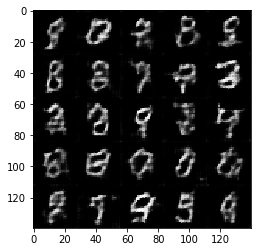

Epoch 2/2... Discriminator Loss: 1.5638... Generator Loss: 0.4143
Epoch 2/2... Discriminator Loss: 1.5403... Generator Loss: 0.3684
Epoch 2/2... Discriminator Loss: 1.5329... Generator Loss: 0.3838
Epoch 2/2... Discriminator Loss: 1.5645... Generator Loss: 0.3479
Epoch 2/2... Discriminator Loss: 1.5138... Generator Loss: 0.3921
Epoch 2/2... Discriminator Loss: 1.5253... Generator Loss: 0.3622
Epoch 2/2... Discriminator Loss: 1.5537... Generator Loss: 0.3480
Epoch 2/2... Discriminator Loss: 1.4886... Generator Loss: 0.4115
Epoch 2/2... Discriminator Loss: 1.5436... Generator Loss: 0.3577
Epoch 2/2... Discriminator Loss: 1.5100... Generator Loss: 0.4242


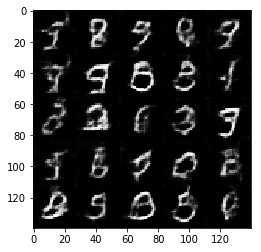

Epoch 2/2... Discriminator Loss: 1.5632... Generator Loss: 0.3462
Epoch 2/2... Discriminator Loss: 1.5168... Generator Loss: 0.4049
Epoch 2/2... Discriminator Loss: 1.5702... Generator Loss: 0.3854
Epoch 2/2... Discriminator Loss: 1.5413... Generator Loss: 0.3537
Epoch 2/2... Discriminator Loss: 1.5213... Generator Loss: 0.3957
Epoch 2/2... Discriminator Loss: 1.6229... Generator Loss: 0.3960
Epoch 2/2... Discriminator Loss: 1.5391... Generator Loss: 0.3567
Epoch 2/2... Discriminator Loss: 1.5192... Generator Loss: 0.3862
Epoch 2/2... Discriminator Loss: 1.5182... Generator Loss: 0.3826
Epoch 2/2... Discriminator Loss: 1.6443... Generator Loss: 0.3315


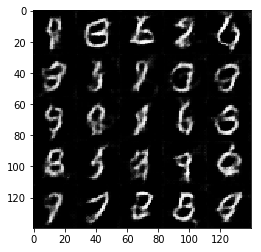

Epoch 2/2... Discriminator Loss: 1.5018... Generator Loss: 0.3825
Epoch 2/2... Discriminator Loss: 1.4925... Generator Loss: 0.3962
Epoch 2/2... Discriminator Loss: 1.5150... Generator Loss: 0.4139
Epoch 2/2... Discriminator Loss: 1.4861... Generator Loss: 0.4014
Epoch 2/2... Discriminator Loss: 1.5019... Generator Loss: 0.3776
Epoch 2/2... Discriminator Loss: 1.5216... Generator Loss: 0.3804
Epoch 2/2... Discriminator Loss: 1.4996... Generator Loss: 0.3962
Epoch 2/2... Discriminator Loss: 1.5304... Generator Loss: 0.3642
Epoch 2/2... Discriminator Loss: 1.5515... Generator Loss: 0.3538
Epoch 2/2... Discriminator Loss: 1.5428... Generator Loss: 0.4292


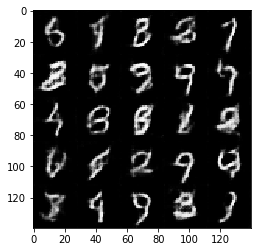

Epoch 2/2... Discriminator Loss: 1.5537... Generator Loss: 0.3758
Epoch 2/2... Discriminator Loss: 1.5535... Generator Loss: 0.3742
Epoch 2/2... Discriminator Loss: 1.5065... Generator Loss: 0.4063
Epoch 2/2... Discriminator Loss: 1.4850... Generator Loss: 0.4015
Epoch 2/2... Discriminator Loss: 1.4714... Generator Loss: 0.4420
Epoch 2/2... Discriminator Loss: 1.5359... Generator Loss: 0.3646
Epoch 2/2... Discriminator Loss: 1.5321... Generator Loss: 0.3744
Epoch 2/2... Discriminator Loss: 1.5722... Generator Loss: 0.3482
Epoch 2/2... Discriminator Loss: 1.5022... Generator Loss: 0.3961
Epoch 2/2... Discriminator Loss: 1.4692... Generator Loss: 0.4281


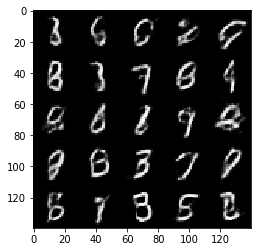

Epoch 2/2... Discriminator Loss: 1.5094... Generator Loss: 0.3915
Epoch 2/2... Discriminator Loss: 1.5214... Generator Loss: 0.3667
Epoch 2/2... Discriminator Loss: 1.4750... Generator Loss: 0.3964
Epoch 2/2... Discriminator Loss: 1.5341... Generator Loss: 0.3624
Epoch 2/2... Discriminator Loss: 1.5106... Generator Loss: 0.4481
Epoch 2/2... Discriminator Loss: 1.5280... Generator Loss: 0.4222
Epoch 2/2... Discriminator Loss: 1.4676... Generator Loss: 0.4134
Epoch 2/2... Discriminator Loss: 1.5331... Generator Loss: 0.4758
Epoch 2/2... Discriminator Loss: 1.4890... Generator Loss: 0.4022
Epoch 2/2... Discriminator Loss: 1.7224... Generator Loss: 0.3278


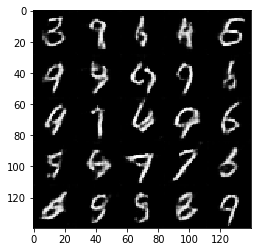

Epoch 2/2... Discriminator Loss: 1.4956... Generator Loss: 0.3940
Epoch 2/2... Discriminator Loss: 1.4704... Generator Loss: 0.4262
Epoch 2/2... Discriminator Loss: 1.4703... Generator Loss: 0.4444
Epoch 2/2... Discriminator Loss: 1.5264... Generator Loss: 0.3678
Epoch 2/2... Discriminator Loss: 1.4885... Generator Loss: 0.3926
Epoch 2/2... Discriminator Loss: 1.5869... Generator Loss: 0.3461
Epoch 2/2... Discriminator Loss: 1.4846... Generator Loss: 0.3984
Epoch 2/2... Discriminator Loss: 1.5179... Generator Loss: 0.3908
Epoch 2/2... Discriminator Loss: 1.4593... Generator Loss: 0.4221
Epoch 2/2... Discriminator Loss: 1.3989... Generator Loss: 0.4729


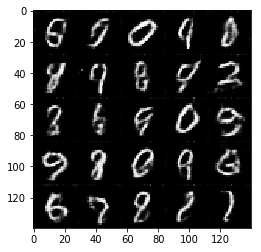

Epoch 2/2... Discriminator Loss: 1.4942... Generator Loss: 0.3904
Epoch 2/2... Discriminator Loss: 1.5569... Generator Loss: 0.3680
Epoch 2/2... Discriminator Loss: 1.4807... Generator Loss: 0.4057
Epoch 2/2... Discriminator Loss: 1.5120... Generator Loss: 0.3920
Epoch 2/2... Discriminator Loss: 1.4551... Generator Loss: 0.4426
Epoch 2/2... Discriminator Loss: 1.5313... Generator Loss: 0.3620
Epoch 2/2... Discriminator Loss: 1.5172... Generator Loss: 0.3657
Epoch 2/2... Discriminator Loss: 1.4851... Generator Loss: 0.4256
Epoch 2/2... Discriminator Loss: 1.5743... Generator Loss: 0.3492
Epoch 2/2... Discriminator Loss: 1.4428... Generator Loss: 0.4089


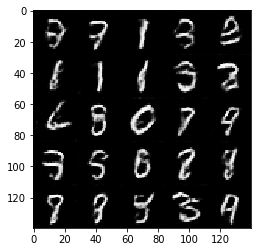

Epoch 2/2... Discriminator Loss: 1.4122... Generator Loss: 0.4597
Epoch 2/2... Discriminator Loss: 1.4133... Generator Loss: 0.4620
Epoch 2/2... Discriminator Loss: 1.5034... Generator Loss: 0.3994
Epoch 2/2... Discriminator Loss: 1.4990... Generator Loss: 0.3861
Epoch 2/2... Discriminator Loss: 1.5365... Generator Loss: 0.3607
Epoch 2/2... Discriminator Loss: 1.4529... Generator Loss: 0.4383
Epoch 2/2... Discriminator Loss: 1.4545... Generator Loss: 0.4302
Epoch 2/2... Discriminator Loss: 1.4817... Generator Loss: 0.3874
Epoch 2/2... Discriminator Loss: 1.4526... Generator Loss: 0.4128
Epoch 2/2... Discriminator Loss: 1.4626... Generator Loss: 0.4700


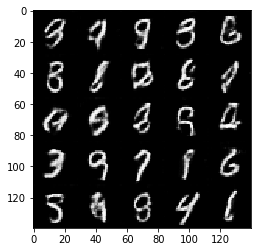

Epoch 2/2... Discriminator Loss: 1.4847... Generator Loss: 0.3866
Epoch 2/2... Discriminator Loss: 1.5004... Generator Loss: 0.3925
Epoch 2/2... Discriminator Loss: 1.4355... Generator Loss: 0.4098
Epoch 2/2... Discriminator Loss: 1.4877... Generator Loss: 0.3807
Epoch 2/2... Discriminator Loss: 1.4456... Generator Loss: 0.4039
Epoch 2/2... Discriminator Loss: 1.4991... Generator Loss: 0.3838
Epoch 2/2... Discriminator Loss: 1.4783... Generator Loss: 0.4344
Epoch 2/2... Discriminator Loss: 1.4530... Generator Loss: 0.4079
Epoch 2/2... Discriminator Loss: 1.5714... Generator Loss: 0.3566
Epoch 2/2... Discriminator Loss: 1.5353... Generator Loss: 0.3633


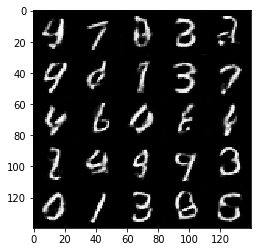

Epoch 2/2... Discriminator Loss: 1.5027... Generator Loss: 0.3738
Epoch 2/2... Discriminator Loss: 1.4985... Generator Loss: 0.4006
Epoch 2/2... Discriminator Loss: 1.5539... Generator Loss: 0.4478
Epoch 2/2... Discriminator Loss: 1.5158... Generator Loss: 0.4079
Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 0.4833
Epoch 2/2... Discriminator Loss: 1.4225... Generator Loss: 0.4468
Epoch 2/2... Discriminator Loss: 1.4994... Generator Loss: 0.3898
Epoch 2/2... Discriminator Loss: 1.5090... Generator Loss: 0.4667
Epoch 2/2... Discriminator Loss: 1.5137... Generator Loss: 0.3683
Epoch 2/2... Discriminator Loss: 1.4634... Generator Loss: 0.4162


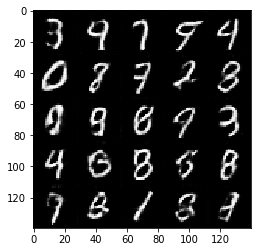

Epoch 2/2... Discriminator Loss: 1.4468... Generator Loss: 0.4007
Epoch 2/2... Discriminator Loss: 1.3885... Generator Loss: 0.4366
Epoch 2/2... Discriminator Loss: 1.3577... Generator Loss: 0.5463
Epoch 2/2... Discriminator Loss: 1.4916... Generator Loss: 0.4031
Epoch 2/2... Discriminator Loss: 1.4393... Generator Loss: 0.4362
Epoch 2/2... Discriminator Loss: 1.4377... Generator Loss: 0.4735
Epoch 2/2... Discriminator Loss: 1.4709... Generator Loss: 0.3931
Epoch 2/2... Discriminator Loss: 1.6251... Generator Loss: 0.3472
Epoch 2/2... Discriminator Loss: 1.5084... Generator Loss: 0.3798
Epoch 2/2... Discriminator Loss: 1.3757... Generator Loss: 0.4405


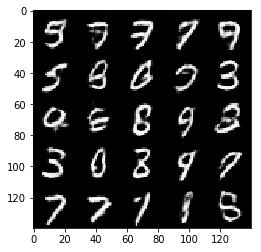

Epoch 2/2... Discriminator Loss: 1.7048... Generator Loss: 0.3223
Epoch 2/2... Discriminator Loss: 1.5081... Generator Loss: 0.3738
Epoch 2/2... Discriminator Loss: 1.5236... Generator Loss: 0.3681
Epoch 2/2... Discriminator Loss: 1.5184... Generator Loss: 0.3657
Epoch 2/2... Discriminator Loss: 1.3666... Generator Loss: 0.5127
Epoch 2/2... Discriminator Loss: 1.4511... Generator Loss: 0.4440
Epoch 2/2... Discriminator Loss: 1.4435... Generator Loss: 0.4666
Epoch 2/2... Discriminator Loss: 1.5075... Generator Loss: 0.4084
Epoch 2/2... Discriminator Loss: 1.5629... Generator Loss: 0.3575
Epoch 2/2... Discriminator Loss: 1.4052... Generator Loss: 0.4359


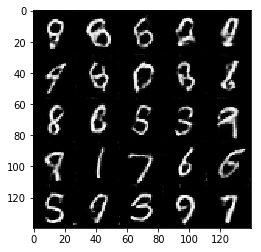

Epoch 2/2... Discriminator Loss: 1.4847... Generator Loss: 0.3863
Epoch 2/2... Discriminator Loss: 1.7762... Generator Loss: 0.5171
Epoch 2/2... Discriminator Loss: 1.5240... Generator Loss: 0.3796
Epoch 2/2... Discriminator Loss: 1.4622... Generator Loss: 0.4249
Epoch 2/2... Discriminator Loss: 1.4175... Generator Loss: 0.4311
Epoch 2/2... Discriminator Loss: 1.4590... Generator Loss: 0.4022
Epoch 2/2... Discriminator Loss: 1.4781... Generator Loss: 0.4000
Epoch 2/2... Discriminator Loss: 1.4303... Generator Loss: 0.4453
Epoch 2/2... Discriminator Loss: 1.4438... Generator Loss: 0.4486
Epoch 2/2... Discriminator Loss: 1.4475... Generator Loss: 0.4486


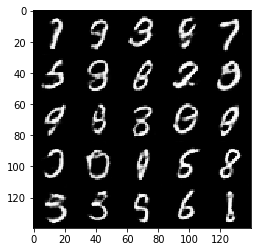

Epoch 2/2... Discriminator Loss: 1.5134... Generator Loss: 0.4249
Epoch 2/2... Discriminator Loss: 1.4320... Generator Loss: 0.4266
Epoch 2/2... Discriminator Loss: 1.3700... Generator Loss: 0.4782
Epoch 2/2... Discriminator Loss: 1.5619... Generator Loss: 0.3544
Epoch 2/2... Discriminator Loss: 1.6186... Generator Loss: 0.3462
Epoch 2/2... Discriminator Loss: 1.4994... Generator Loss: 0.3826
Epoch 2/2... Discriminator Loss: 1.4237... Generator Loss: 0.4476
Epoch 2/2... Discriminator Loss: 1.3550... Generator Loss: 0.5474
Epoch 2/2... Discriminator Loss: 1.3892... Generator Loss: 0.4472
Epoch 2/2... Discriminator Loss: 1.4001... Generator Loss: 0.4485


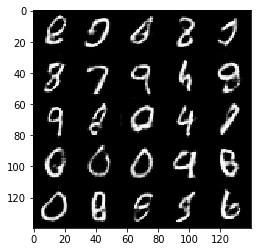

Epoch 2/2... Discriminator Loss: 1.7056... Generator Loss: 0.3305
Epoch 2/2... Discriminator Loss: 1.4934... Generator Loss: 0.3931
Epoch 2/2... Discriminator Loss: 1.5362... Generator Loss: 0.3696
Epoch 2/2... Discriminator Loss: 1.5430... Generator Loss: 0.3629
Epoch 2/2... Discriminator Loss: 1.3899... Generator Loss: 0.4444
Epoch 2/2... Discriminator Loss: 1.5202... Generator Loss: 0.3701
Epoch 2/2... Discriminator Loss: 1.4542... Generator Loss: 0.4004
Epoch 2/2... Discriminator Loss: 1.4311... Generator Loss: 0.4247
Epoch 2/2... Discriminator Loss: 1.5866... Generator Loss: 0.3574
Epoch 2/2... Discriminator Loss: 1.4621... Generator Loss: 0.4274


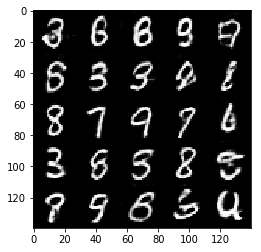

Epoch 2/2... Discriminator Loss: 1.4105... Generator Loss: 0.5088
Epoch 2/2... Discriminator Loss: 1.4103... Generator Loss: 0.4613
Epoch 2/2... Discriminator Loss: 1.4292... Generator Loss: 0.4269
Epoch 2/2... Discriminator Loss: 1.5040... Generator Loss: 0.5895
Epoch 2/2... Discriminator Loss: 1.3915... Generator Loss: 0.4812
Epoch 2/2... Discriminator Loss: 1.4400... Generator Loss: 0.4280
Epoch 2/2... Discriminator Loss: 1.4869... Generator Loss: 0.4006
Epoch 2/2... Discriminator Loss: 1.4266... Generator Loss: 0.4309
Epoch 2/2... Discriminator Loss: 1.4420... Generator Loss: 0.4575
Epoch 2/2... Discriminator Loss: 1.3253... Generator Loss: 0.4714


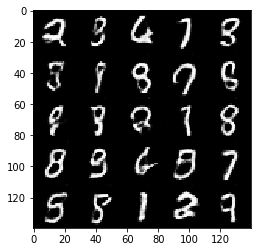

Epoch 2/2... Discriminator Loss: 1.6612... Generator Loss: 0.3513
Epoch 2/2... Discriminator Loss: 1.6353... Generator Loss: 0.3460
Epoch 2/2... Discriminator Loss: 1.4232... Generator Loss: 0.4238
Epoch 2/2... Discriminator Loss: 1.3080... Generator Loss: 0.5011
Epoch 2/2... Discriminator Loss: 1.3171... Generator Loss: 0.5095
Epoch 2/2... Discriminator Loss: 1.3241... Generator Loss: 0.4840
Epoch 2/2... Discriminator Loss: 1.8462... Generator Loss: 0.3245
Epoch 2/2... Discriminator Loss: 1.3645... Generator Loss: 0.4986
Epoch 2/2... Discriminator Loss: 1.2992... Generator Loss: 0.5332
Epoch 2/2... Discriminator Loss: 1.3619... Generator Loss: 0.4680


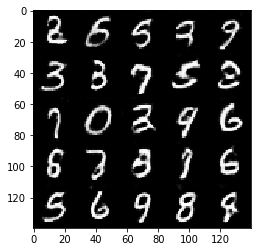

Epoch 2/2... Discriminator Loss: 1.3851... Generator Loss: 0.4406
Epoch 2/2... Discriminator Loss: 1.4819... Generator Loss: 0.3973
Epoch 2/2... Discriminator Loss: 1.3606... Generator Loss: 0.5483
Epoch 2/2... Discriminator Loss: 1.4446... Generator Loss: 0.4138
Epoch 2/2... Discriminator Loss: 1.4055... Generator Loss: 0.4543


In [19]:
batch_size = 32
z_dim = 150
learning_rate = 0.001
beta1 = 0.3

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6566... Generator Loss: 0.4447
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.5405
Epoch 1/1... Discriminator Loss: 1.5509... Generator Loss: 0.5102
Epoch 1/1... Discriminator Loss: 1.6707... Generator Loss: 0.4134
Epoch 1/1... Discriminator Loss: 1.6901... Generator Loss: 0.4352
Epoch 1/1... Discriminator Loss: 1.6832... Generator Loss: 0.4203
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.6173... Generator Loss: 0.4092
Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.5144


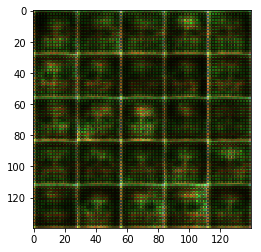

Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.2084... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.7591... Generator Loss: 0.4639
Epoch 1/1... Discriminator Loss: 1.2106... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 2.1719... Generator Loss: 0.3197
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.6721


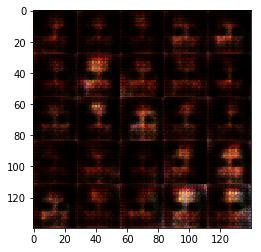

Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.2242... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.8257... Generator Loss: 0.4402
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.4898
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.5747
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.6215... Generator Loss: 0.5354
Epoch 1/1... Discriminator Loss: 1.5970... Generator Loss: 0.4176
Epoch 1/1... Discriminator Loss: 2.1190... Generator Loss: 0.3204


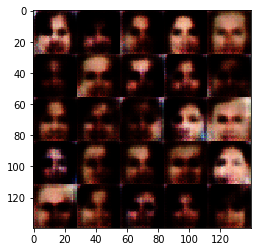

Epoch 1/1... Discriminator Loss: 1.5244... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.7985... Generator Loss: 0.3238
Epoch 1/1... Discriminator Loss: 1.6696... Generator Loss: 0.3930
Epoch 1/1... Discriminator Loss: 1.6717... Generator Loss: 0.3961
Epoch 1/1... Discriminator Loss: 1.6857... Generator Loss: 0.3761
Epoch 1/1... Discriminator Loss: 1.6707... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.5773... Generator Loss: 0.4281
Epoch 1/1... Discriminator Loss: 1.6483... Generator Loss: 0.3965
Epoch 1/1... Discriminator Loss: 2.0176... Generator Loss: 0.3275
Epoch 1/1... Discriminator Loss: 1.7001... Generator Loss: 0.3724


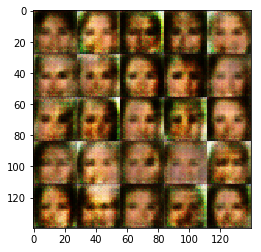

Epoch 1/1... Discriminator Loss: 1.6946... Generator Loss: 0.3714
Epoch 1/1... Discriminator Loss: 1.6020... Generator Loss: 0.4258
Epoch 1/1... Discriminator Loss: 1.6153... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.5712... Generator Loss: 0.4260
Epoch 1/1... Discriminator Loss: 1.8017... Generator Loss: 0.4761
Epoch 1/1... Discriminator Loss: 1.6834... Generator Loss: 0.3947
Epoch 1/1... Discriminator Loss: 1.6473... Generator Loss: 0.3970
Epoch 1/1... Discriminator Loss: 1.6001... Generator Loss: 0.4427
Epoch 1/1... Discriminator Loss: 1.7464... Generator Loss: 0.3516
Epoch 1/1... Discriminator Loss: 1.6660... Generator Loss: 0.3905


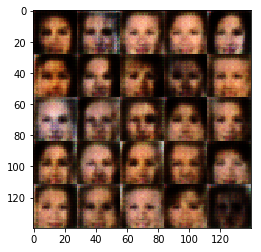

Epoch 1/1... Discriminator Loss: 1.6505... Generator Loss: 0.3919
Epoch 1/1... Discriminator Loss: 1.6674... Generator Loss: 0.3847
Epoch 1/1... Discriminator Loss: 1.6652... Generator Loss: 0.3930
Epoch 1/1... Discriminator Loss: 1.5951... Generator Loss: 0.4231
Epoch 1/1... Discriminator Loss: 1.6829... Generator Loss: 0.3872
Epoch 1/1... Discriminator Loss: 1.7034... Generator Loss: 0.3750
Epoch 1/1... Discriminator Loss: 1.6573... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 1.5607... Generator Loss: 0.4536
Epoch 1/1... Discriminator Loss: 1.6605... Generator Loss: 0.3866
Epoch 1/1... Discriminator Loss: 1.6772... Generator Loss: 0.3820


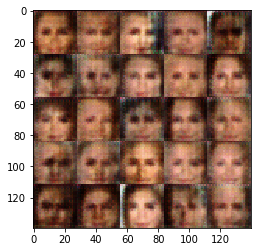

Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 1.6671... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 1.5915... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 1.8304... Generator Loss: 0.3308
Epoch 1/1... Discriminator Loss: 1.6717... Generator Loss: 0.3881
Epoch 1/1... Discriminator Loss: 1.6384... Generator Loss: 0.4152
Epoch 1/1... Discriminator Loss: 1.6646... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.6558... Generator Loss: 0.3895
Epoch 1/1... Discriminator Loss: 1.5559... Generator Loss: 0.4605
Epoch 1/1... Discriminator Loss: 1.6467... Generator Loss: 0.4027


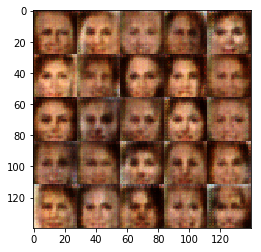

Epoch 1/1... Discriminator Loss: 1.5585... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 1.6199... Generator Loss: 0.4232
Epoch 1/1... Discriminator Loss: 1.7587... Generator Loss: 0.3373
Epoch 1/1... Discriminator Loss: 1.7045... Generator Loss: 0.3661
Epoch 1/1... Discriminator Loss: 1.6793... Generator Loss: 0.3820
Epoch 1/1... Discriminator Loss: 1.6740... Generator Loss: 0.3883
Epoch 1/1... Discriminator Loss: 1.6637... Generator Loss: 0.3914
Epoch 1/1... Discriminator Loss: 1.6543... Generator Loss: 0.4011
Epoch 1/1... Discriminator Loss: 1.6558... Generator Loss: 0.3944
Epoch 1/1... Discriminator Loss: 1.6628... Generator Loss: 0.3970


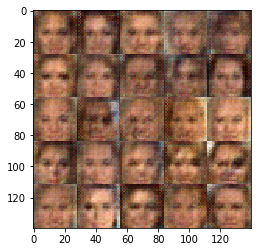

Epoch 1/1... Discriminator Loss: 1.6759... Generator Loss: 0.3862
Epoch 1/1... Discriminator Loss: 1.6573... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 1.6604... Generator Loss: 0.3953
Epoch 1/1... Discriminator Loss: 1.6743... Generator Loss: 0.3860
Epoch 1/1... Discriminator Loss: 1.6508... Generator Loss: 0.3902
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.6700... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 1.6579... Generator Loss: 0.4067
Epoch 1/1... Discriminator Loss: 1.6583... Generator Loss: 0.3990
Epoch 1/1... Discriminator Loss: 1.6489... Generator Loss: 0.3999


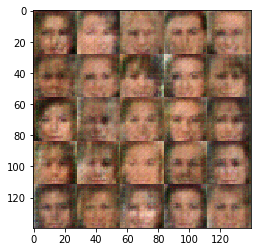

Epoch 1/1... Discriminator Loss: 1.6541... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.6545... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.6627... Generator Loss: 0.4008
Epoch 1/1... Discriminator Loss: 1.6555... Generator Loss: 0.3983
Epoch 1/1... Discriminator Loss: 1.6394... Generator Loss: 0.4067
Epoch 1/1... Discriminator Loss: 1.6316... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.6466... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 1.6408... Generator Loss: 0.3976
Epoch 1/1... Discriminator Loss: 1.6436... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.6639... Generator Loss: 0.3997


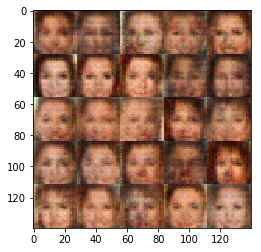

Epoch 1/1... Discriminator Loss: 1.6470... Generator Loss: 0.3986
Epoch 1/1... Discriminator Loss: 1.6359... Generator Loss: 0.4069
Epoch 1/1... Discriminator Loss: 1.6519... Generator Loss: 0.4055
Epoch 1/1... Discriminator Loss: 1.6551... Generator Loss: 0.4074
Epoch 1/1... Discriminator Loss: 1.6507... Generator Loss: 0.4048
Epoch 1/1... Discriminator Loss: 1.6459... Generator Loss: 0.4000
Epoch 1/1... Discriminator Loss: 1.6596... Generator Loss: 0.3986
Epoch 1/1... Discriminator Loss: 1.6306... Generator Loss: 0.4111
Epoch 1/1... Discriminator Loss: 1.6483... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6491... Generator Loss: 0.4025


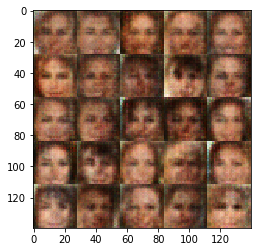

Epoch 1/1... Discriminator Loss: 1.6475... Generator Loss: 0.4055
Epoch 1/1... Discriminator Loss: 1.6524... Generator Loss: 0.4073
Epoch 1/1... Discriminator Loss: 1.6437... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 1.6383... Generator Loss: 0.4087
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 0.4027
Epoch 1/1... Discriminator Loss: 1.6432... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6313... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.6405... Generator Loss: 0.4069
Epoch 1/1... Discriminator Loss: 1.6335... Generator Loss: 0.4118
Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 0.4136


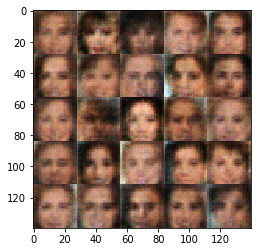

Epoch 1/1... Discriminator Loss: 1.6245... Generator Loss: 0.4172
Epoch 1/1... Discriminator Loss: 1.6504... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.4070
Epoch 1/1... Discriminator Loss: 1.6554... Generator Loss: 0.4016
Epoch 1/1... Discriminator Loss: 1.6466... Generator Loss: 0.4051
Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.4113
Epoch 1/1... Discriminator Loss: 1.6458... Generator Loss: 0.4083
Epoch 1/1... Discriminator Loss: 1.6314... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.6448... Generator Loss: 0.4052
Epoch 1/1... Discriminator Loss: 1.6444... Generator Loss: 0.4107


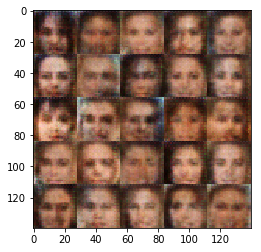

Epoch 1/1... Discriminator Loss: 1.6326... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.6472... Generator Loss: 0.4020
Epoch 1/1... Discriminator Loss: 1.6397... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 0.4049
Epoch 1/1... Discriminator Loss: 1.6412... Generator Loss: 0.4075
Epoch 1/1... Discriminator Loss: 1.6454... Generator Loss: 0.4022
Epoch 1/1... Discriminator Loss: 1.6529... Generator Loss: 0.3909
Epoch 1/1... Discriminator Loss: 1.6526... Generator Loss: 0.4015
Epoch 1/1... Discriminator Loss: 1.6506... Generator Loss: 0.4058


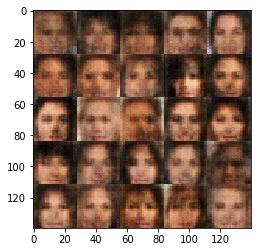

Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 0.4100
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.4105
Epoch 1/1... Discriminator Loss: 1.6432... Generator Loss: 0.4072
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.4120
Epoch 1/1... Discriminator Loss: 1.6308... Generator Loss: 0.4176
Epoch 1/1... Discriminator Loss: 1.6699... Generator Loss: 0.3932
Epoch 1/1... Discriminator Loss: 1.6417... Generator Loss: 0.4097
Epoch 1/1... Discriminator Loss: 1.6404... Generator Loss: 0.4126


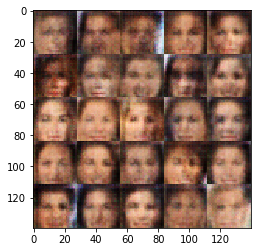

Epoch 1/1... Discriminator Loss: 1.6336... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 1.6368... Generator Loss: 0.4111
Epoch 1/1... Discriminator Loss: 1.6528... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.6268... Generator Loss: 0.4187
Epoch 1/1... Discriminator Loss: 1.6207... Generator Loss: 0.4143
Epoch 1/1... Discriminator Loss: 1.6374... Generator Loss: 0.4155
Epoch 1/1... Discriminator Loss: 1.6329... Generator Loss: 0.4113
Epoch 1/1... Discriminator Loss: 1.6271... Generator Loss: 0.4085
Epoch 1/1... Discriminator Loss: 1.6300... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 1.6234... Generator Loss: 0.4189


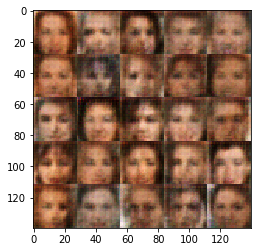

Epoch 1/1... Discriminator Loss: 1.6606... Generator Loss: 0.4013
Epoch 1/1... Discriminator Loss: 1.6220... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.6357... Generator Loss: 0.4098
Epoch 1/1... Discriminator Loss: 1.6459... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 1.6322... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.6401... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.6455... Generator Loss: 0.4019
Epoch 1/1... Discriminator Loss: 1.6336... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.6301... Generator Loss: 0.4107
Epoch 1/1... Discriminator Loss: 1.6390... Generator Loss: 0.4131


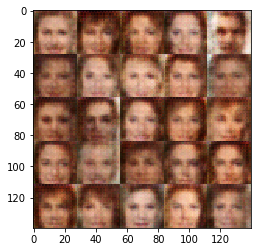

Epoch 1/1... Discriminator Loss: 1.6353... Generator Loss: 0.4164
Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.4108
Epoch 1/1... Discriminator Loss: 1.6570... Generator Loss: 0.3946
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 0.4122
Epoch 1/1... Discriminator Loss: 1.6477... Generator Loss: 0.4061
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.4162
Epoch 1/1... Discriminator Loss: 1.6347... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 1.6384... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.6417... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 1.6483... Generator Loss: 0.4064


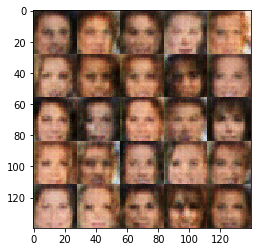

Epoch 1/1... Discriminator Loss: 1.6371... Generator Loss: 0.4118
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.4225
Epoch 1/1... Discriminator Loss: 1.6392... Generator Loss: 0.4077
Epoch 1/1... Discriminator Loss: 1.6516... Generator Loss: 0.4025
Epoch 1/1... Discriminator Loss: 1.6223... Generator Loss: 0.4189
Epoch 1/1... Discriminator Loss: 1.6415... Generator Loss: 0.4141
Epoch 1/1... Discriminator Loss: 1.6433... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 1.6522... Generator Loss: 0.3932
Epoch 1/1... Discriminator Loss: 1.6333... Generator Loss: 0.4127
Epoch 1/1... Discriminator Loss: 1.6415... Generator Loss: 0.4124


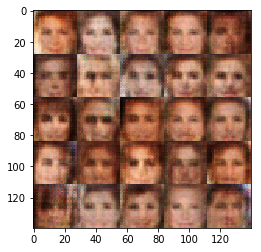

Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 1.6311... Generator Loss: 0.4059
Epoch 1/1... Discriminator Loss: 1.6509... Generator Loss: 0.4048
Epoch 1/1... Discriminator Loss: 1.6434... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 1.6347... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 1.6476... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.6356... Generator Loss: 0.4136
Epoch 1/1... Discriminator Loss: 1.6309... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.6436... Generator Loss: 0.4046


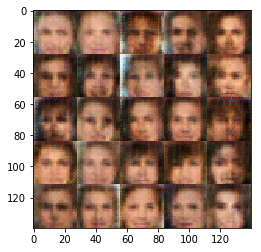

Epoch 1/1... Discriminator Loss: 1.6381... Generator Loss: 0.4089
Epoch 1/1... Discriminator Loss: 1.6448... Generator Loss: 0.4075
Epoch 1/1... Discriminator Loss: 1.6386... Generator Loss: 0.4148
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3980
Epoch 1/1... Discriminator Loss: 1.6388... Generator Loss: 0.4069
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 0.4151
Epoch 1/1... Discriminator Loss: 1.6329... Generator Loss: 0.4104
Epoch 1/1... Discriminator Loss: 1.6401... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.6264... Generator Loss: 0.4189
Epoch 1/1... Discriminator Loss: 1.6299... Generator Loss: 0.4107


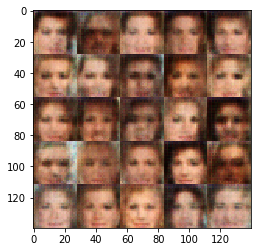

Epoch 1/1... Discriminator Loss: 1.6385... Generator Loss: 0.4119
Epoch 1/1... Discriminator Loss: 1.6289... Generator Loss: 0.4156
Epoch 1/1... Discriminator Loss: 1.6276... Generator Loss: 0.4198
Epoch 1/1... Discriminator Loss: 1.6204... Generator Loss: 0.4214
Epoch 1/1... Discriminator Loss: 1.6327... Generator Loss: 0.4101
Epoch 1/1... Discriminator Loss: 1.6263... Generator Loss: 0.4167
Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 0.4015
Epoch 1/1... Discriminator Loss: 1.6290... Generator Loss: 0.4239
Epoch 1/1... Discriminator Loss: 1.6245... Generator Loss: 0.4217
Epoch 1/1... Discriminator Loss: 1.6284... Generator Loss: 0.4092


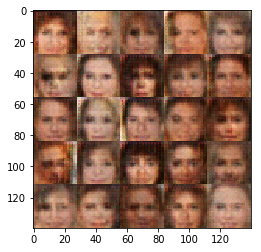

Epoch 1/1... Discriminator Loss: 1.6364... Generator Loss: 0.4150
Epoch 1/1... Discriminator Loss: 1.6297... Generator Loss: 0.4089
Epoch 1/1... Discriminator Loss: 1.6186... Generator Loss: 0.4195
Epoch 1/1... Discriminator Loss: 1.6314... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.6365... Generator Loss: 0.4091
Epoch 1/1... Discriminator Loss: 1.6370... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 1.6320... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.6247... Generator Loss: 0.4194
Epoch 1/1... Discriminator Loss: 1.6296... Generator Loss: 0.4235
Epoch 1/1... Discriminator Loss: 1.6087... Generator Loss: 0.4285


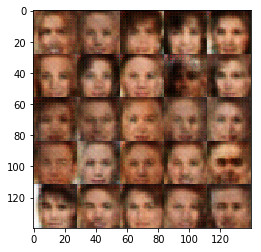

Epoch 1/1... Discriminator Loss: 1.6229... Generator Loss: 0.4173
Epoch 1/1... Discriminator Loss: 1.6011... Generator Loss: 0.4384
Epoch 1/1... Discriminator Loss: 1.6211... Generator Loss: 0.4316
Epoch 1/1... Discriminator Loss: 1.6116... Generator Loss: 0.4076
Epoch 1/1... Discriminator Loss: 1.7495... Generator Loss: 0.3789
Epoch 1/1... Discriminator Loss: 1.6562... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.6374... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.6366... Generator Loss: 0.4219
Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.6504... Generator Loss: 0.4037


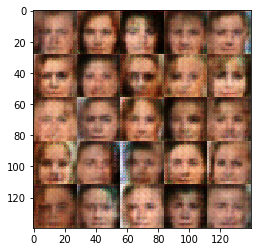

Epoch 1/1... Discriminator Loss: 1.6370... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 1.6394... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6331... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.6395... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 1.6381... Generator Loss: 0.4096
Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 0.4062
Epoch 1/1... Discriminator Loss: 1.6453... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.4100
Epoch 1/1... Discriminator Loss: 1.6380... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.6386... Generator Loss: 0.4083


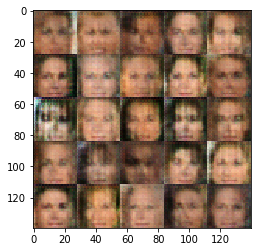

Epoch 1/1... Discriminator Loss: 1.6474... Generator Loss: 0.3979
Epoch 1/1... Discriminator Loss: 1.6279... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.6429... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.6401... Generator Loss: 0.4019
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.4069
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.3948
Epoch 1/1... Discriminator Loss: 1.6421... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.6196... Generator Loss: 0.4212
Epoch 1/1... Discriminator Loss: 1.6252... Generator Loss: 0.4218
Epoch 1/1... Discriminator Loss: 1.6427... Generator Loss: 0.4127


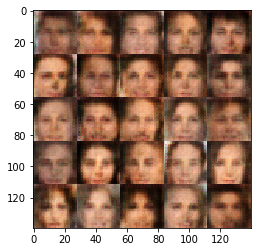

Epoch 1/1... Discriminator Loss: 1.6186... Generator Loss: 0.4249
Epoch 1/1... Discriminator Loss: 1.6296... Generator Loss: 0.4175
Epoch 1/1... Discriminator Loss: 1.6312... Generator Loss: 0.4174
Epoch 1/1... Discriminator Loss: 1.5821... Generator Loss: 0.4573
Epoch 1/1... Discriminator Loss: 1.5714... Generator Loss: 0.4597
Epoch 1/1... Discriminator Loss: 1.6018... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 1.6575... Generator Loss: 0.4012
Epoch 1/1... Discriminator Loss: 1.6441... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.6280... Generator Loss: 0.4229
Epoch 1/1... Discriminator Loss: 1.6530... Generator Loss: 0.4045


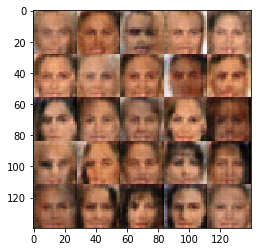

Epoch 1/1... Discriminator Loss: 1.6236... Generator Loss: 0.4313
Epoch 1/1... Discriminator Loss: 1.7235... Generator Loss: 0.4399
Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.4055
Epoch 1/1... Discriminator Loss: 1.6282... Generator Loss: 0.4210
Epoch 1/1... Discriminator Loss: 1.5812... Generator Loss: 0.4464
Epoch 1/1... Discriminator Loss: 1.7108... Generator Loss: 0.3550
Epoch 1/1... Discriminator Loss: 1.6497... Generator Loss: 0.4050
Epoch 1/1... Discriminator Loss: 1.6479... Generator Loss: 0.4077
Epoch 1/1... Discriminator Loss: 1.6178... Generator Loss: 0.4201
Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 0.4120


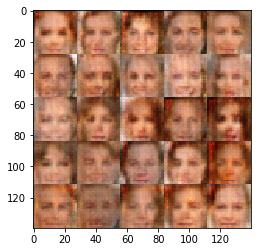

Epoch 1/1... Discriminator Loss: 1.6368... Generator Loss: 0.4113
Epoch 1/1... Discriminator Loss: 1.6459... Generator Loss: 0.4010
Epoch 1/1... Discriminator Loss: 1.6195... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 1.6349... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 1.6337... Generator Loss: 0.4072
Epoch 1/1... Discriminator Loss: 1.6587... Generator Loss: 0.3916
Epoch 1/1... Discriminator Loss: 1.6225... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.6424... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.6013... Generator Loss: 0.4291
Epoch 1/1... Discriminator Loss: 1.5811... Generator Loss: 0.4320


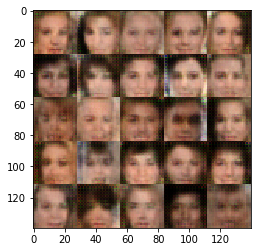

Epoch 1/1... Discriminator Loss: 1.6529... Generator Loss: 0.3933
Epoch 1/1... Discriminator Loss: 1.5745... Generator Loss: 0.4399
Epoch 1/1... Discriminator Loss: 1.6674... Generator Loss: 0.3910
Epoch 1/1... Discriminator Loss: 1.6282... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.6171... Generator Loss: 0.4238
Epoch 1/1... Discriminator Loss: 1.6394... Generator Loss: 0.4131
Epoch 1/1... Discriminator Loss: 1.6343... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 1.6927... Generator Loss: 0.3803
Epoch 1/1... Discriminator Loss: 1.6266... Generator Loss: 0.4138
Epoch 1/1... Discriminator Loss: 1.6542... Generator Loss: 0.3905


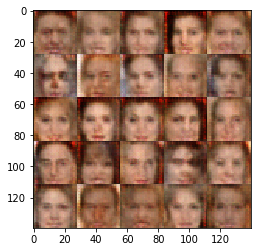

Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.3983
Epoch 1/1... Discriminator Loss: 1.6819... Generator Loss: 0.3691
Epoch 1/1... Discriminator Loss: 1.5629... Generator Loss: 0.4321
Epoch 1/1... Discriminator Loss: 1.6413... Generator Loss: 0.4020
Epoch 1/1... Discriminator Loss: 1.6485... Generator Loss: 0.3986
Epoch 1/1... Discriminator Loss: 1.6418... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.6523... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.6398... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.6511... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 1.6200... Generator Loss: 0.4203


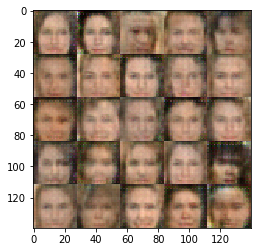

Epoch 1/1... Discriminator Loss: 1.5968... Generator Loss: 0.4221
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.4549
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 0.4361
Epoch 1/1... Discriminator Loss: 1.6635... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 1.6752... Generator Loss: 0.3716
Epoch 1/1... Discriminator Loss: 1.5927... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.6746... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 1.6340... Generator Loss: 0.4129
Epoch 1/1... Discriminator Loss: 1.6653... Generator Loss: 0.3827
Epoch 1/1... Discriminator Loss: 1.6188... Generator Loss: 0.4212


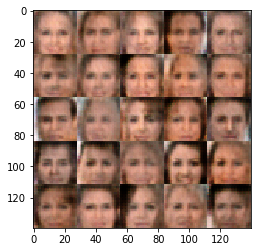

Epoch 1/1... Discriminator Loss: 1.7724... Generator Loss: 0.3447
Epoch 1/1... Discriminator Loss: 1.6474... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 1.6617... Generator Loss: 0.4002
Epoch 1/1... Discriminator Loss: 1.6007... Generator Loss: 0.4278
Epoch 1/1... Discriminator Loss: 1.6382... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.3869
Epoch 1/1... Discriminator Loss: 1.6206... Generator Loss: 0.4240
Epoch 1/1... Discriminator Loss: 1.6222... Generator Loss: 0.4052
Epoch 1/1... Discriminator Loss: 1.6501... Generator Loss: 0.4129


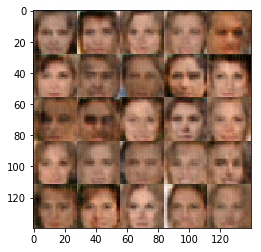

Epoch 1/1... Discriminator Loss: 1.6220... Generator Loss: 0.4280
Epoch 1/1... Discriminator Loss: 1.6266... Generator Loss: 0.4081
Epoch 1/1... Discriminator Loss: 1.5902... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.6404... Generator Loss: 0.4146
Epoch 1/1... Discriminator Loss: 1.6437... Generator Loss: 0.3909
Epoch 1/1... Discriminator Loss: 1.6413... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 1.6584... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.6677... Generator Loss: 0.4072
Epoch 1/1... Discriminator Loss: 1.6245... Generator Loss: 0.4073
Epoch 1/1... Discriminator Loss: 1.5955... Generator Loss: 0.4181


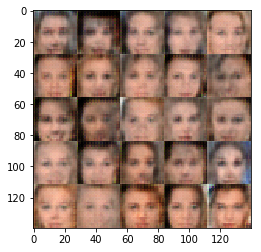

Epoch 1/1... Discriminator Loss: 1.6479... Generator Loss: 0.4174
Epoch 1/1... Discriminator Loss: 1.6552... Generator Loss: 0.3939
Epoch 1/1... Discriminator Loss: 1.6246... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.5791... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 1.6441... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.6676... Generator Loss: 0.3997
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.4005
Epoch 1/1... Discriminator Loss: 1.6290... Generator Loss: 0.3972
Epoch 1/1... Discriminator Loss: 1.6030... Generator Loss: 0.4273
Epoch 1/1... Discriminator Loss: 1.5997... Generator Loss: 0.4130


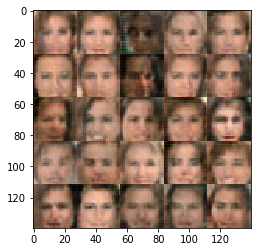

Epoch 1/1... Discriminator Loss: 1.6464... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 1.6238... Generator Loss: 0.4085
Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.4030
Epoch 1/1... Discriminator Loss: 1.6324... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.6324... Generator Loss: 0.4152
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.6844... Generator Loss: 0.3832
Epoch 1/1... Discriminator Loss: 1.6514... Generator Loss: 0.4450
Epoch 1/1... Discriminator Loss: 1.6232... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6576... Generator Loss: 0.3889


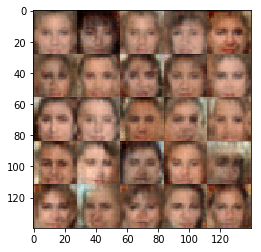

Epoch 1/1... Discriminator Loss: 1.6083... Generator Loss: 0.4248
Epoch 1/1... Discriminator Loss: 1.6835... Generator Loss: 0.3849
Epoch 1/1... Discriminator Loss: 1.6514... Generator Loss: 0.3985
Epoch 1/1... Discriminator Loss: 1.6509... Generator Loss: 0.3897
Epoch 1/1... Discriminator Loss: 1.6544... Generator Loss: 0.3977
Epoch 1/1... Discriminator Loss: 1.6587... Generator Loss: 0.4011
Epoch 1/1... Discriminator Loss: 1.6539... Generator Loss: 0.3930
Epoch 1/1... Discriminator Loss: 1.6462... Generator Loss: 0.4035
Epoch 1/1... Discriminator Loss: 1.6757... Generator Loss: 0.3772
Epoch 1/1... Discriminator Loss: 1.6494... Generator Loss: 0.3965


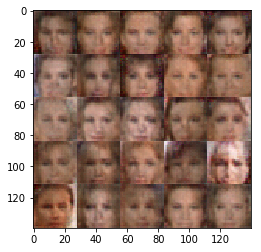

Epoch 1/1... Discriminator Loss: 1.6320... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6344... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.6242... Generator Loss: 0.4074
Epoch 1/1... Discriminator Loss: 1.6595... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 1.6476... Generator Loss: 0.3991
Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.4187
Epoch 1/1... Discriminator Loss: 1.6349... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 1.6388... Generator Loss: 0.4142
Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.4011


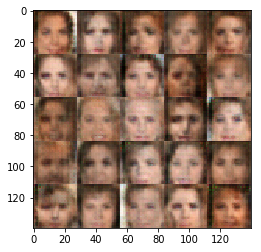

Epoch 1/1... Discriminator Loss: 1.6371... Generator Loss: 0.4130
Epoch 1/1... Discriminator Loss: 1.6440... Generator Loss: 0.4009
Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.4147
Epoch 1/1... Discriminator Loss: 1.6550... Generator Loss: 0.3996
Epoch 1/1... Discriminator Loss: 1.6422... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.6428... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 1.6417... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.6354... Generator Loss: 0.4112
Epoch 1/1... Discriminator Loss: 1.6382... Generator Loss: 0.4086


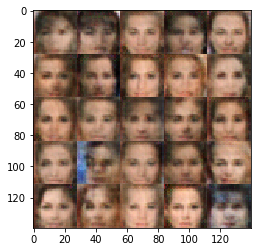

Epoch 1/1... Discriminator Loss: 1.6339... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.6483... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.6376... Generator Loss: 0.4111
Epoch 1/1... Discriminator Loss: 1.6378... Generator Loss: 0.3989
Epoch 1/1... Discriminator Loss: 1.6169... Generator Loss: 0.4225
Epoch 1/1... Discriminator Loss: 1.6327... Generator Loss: 0.4107
Epoch 1/1... Discriminator Loss: 1.5954... Generator Loss: 0.4120
Epoch 1/1... Discriminator Loss: 1.6593... Generator Loss: 0.4044
Epoch 1/1... Discriminator Loss: 1.6367... Generator Loss: 0.3991
Epoch 1/1... Discriminator Loss: 1.5894... Generator Loss: 0.4321


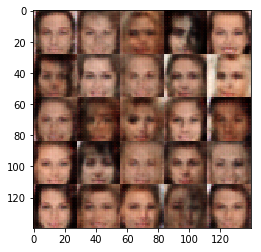

Epoch 1/1... Discriminator Loss: 1.6339... Generator Loss: 0.4196
Epoch 1/1... Discriminator Loss: 1.6101... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.6722... Generator Loss: 0.3883
Epoch 1/1... Discriminator Loss: 1.6511... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 1.6457... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.6298... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.6257... Generator Loss: 0.4164
Epoch 1/1... Discriminator Loss: 1.6451... Generator Loss: 0.4521
Epoch 1/1... Discriminator Loss: 1.6526... Generator Loss: 0.3923
Epoch 1/1... Discriminator Loss: 1.6181... Generator Loss: 0.4492


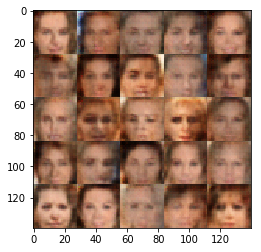

Epoch 1/1... Discriminator Loss: 1.6671... Generator Loss: 0.3863
Epoch 1/1... Discriminator Loss: 1.5869... Generator Loss: 0.4422
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.5384... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 1.6015... Generator Loss: 0.4394
Epoch 1/1... Discriminator Loss: 1.6591... Generator Loss: 0.3927
Epoch 1/1... Discriminator Loss: 1.6359... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.6477... Generator Loss: 0.4043
Epoch 1/1... Discriminator Loss: 1.6437... Generator Loss: 0.3989
Epoch 1/1... Discriminator Loss: 1.6355... Generator Loss: 0.4260


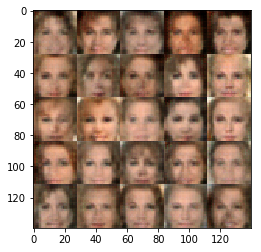

Epoch 1/1... Discriminator Loss: 1.6589... Generator Loss: 0.3969
Epoch 1/1... Discriminator Loss: 1.6507... Generator Loss: 0.4024
Epoch 1/1... Discriminator Loss: 1.6337... Generator Loss: 0.4144
Epoch 1/1... Discriminator Loss: 1.6224... Generator Loss: 0.4135
Epoch 1/1... Discriminator Loss: 1.6430... Generator Loss: 0.3927
Epoch 1/1... Discriminator Loss: 1.5930... Generator Loss: 0.4120
Epoch 1/1... Discriminator Loss: 1.6619... Generator Loss: 0.3950
Epoch 1/1... Discriminator Loss: 1.5807... Generator Loss: 0.4410
Epoch 1/1... Discriminator Loss: 1.6110... Generator Loss: 0.4202
Epoch 1/1... Discriminator Loss: 1.6191... Generator Loss: 0.3994


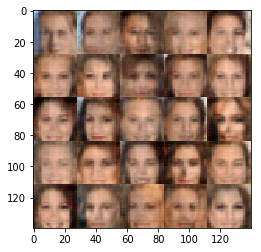

Epoch 1/1... Discriminator Loss: 1.6465... Generator Loss: 0.4099
Epoch 1/1... Discriminator Loss: 1.5956... Generator Loss: 0.4424
Epoch 1/1... Discriminator Loss: 1.6561... Generator Loss: 0.3925
Epoch 1/1... Discriminator Loss: 1.6434... Generator Loss: 0.3998
Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 0.3965
Epoch 1/1... Discriminator Loss: 1.6374... Generator Loss: 0.4289
Epoch 1/1... Discriminator Loss: 1.6709... Generator Loss: 0.3861
Epoch 1/1... Discriminator Loss: 1.6296... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6371... Generator Loss: 0.4051
Epoch 1/1... Discriminator Loss: 1.6563... Generator Loss: 0.3947


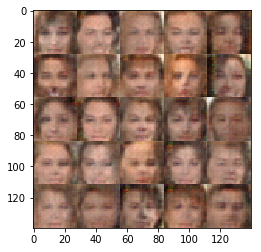

Epoch 1/1... Discriminator Loss: 1.6247... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.6343... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.6275... Generator Loss: 0.4134
Epoch 1/1... Discriminator Loss: 1.6273... Generator Loss: 0.4134
Epoch 1/1... Discriminator Loss: 1.6448... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 0.4281
Epoch 1/1... Discriminator Loss: 1.6109... Generator Loss: 0.4341
Epoch 1/1... Discriminator Loss: 1.6436... Generator Loss: 0.4075
Epoch 1/1... Discriminator Loss: 1.6564... Generator Loss: 0.3899
Epoch 1/1... Discriminator Loss: 1.6414... Generator Loss: 0.4059


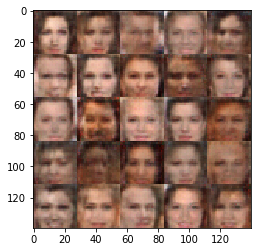

Epoch 1/1... Discriminator Loss: 1.6465... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.5987... Generator Loss: 0.4251
Epoch 1/1... Discriminator Loss: 1.6605... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 1.6056... Generator Loss: 0.4185
Epoch 1/1... Discriminator Loss: 1.6349... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.6351... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.6222... Generator Loss: 0.4175
Epoch 1/1... Discriminator Loss: 1.6591... Generator Loss: 0.3916
Epoch 1/1... Discriminator Loss: 1.6460... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.6556... Generator Loss: 0.3927


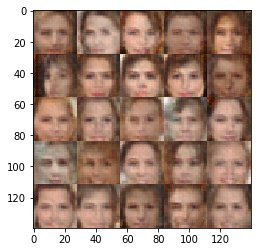

Epoch 1/1... Discriminator Loss: 1.6210... Generator Loss: 0.4060
Epoch 1/1... Discriminator Loss: 1.6201... Generator Loss: 0.4127
Epoch 1/1... Discriminator Loss: 1.6142... Generator Loss: 0.4171
Epoch 1/1... Discriminator Loss: 1.6288... Generator Loss: 0.4114
Epoch 1/1... Discriminator Loss: 1.7031... Generator Loss: 0.3711
Epoch 1/1... Discriminator Loss: 1.6626... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.6482... Generator Loss: 0.3959
Epoch 1/1... Discriminator Loss: 1.6473... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.5816... Generator Loss: 0.4279
Epoch 1/1... Discriminator Loss: 1.6585... Generator Loss: 0.3891


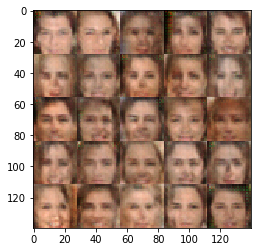

Epoch 1/1... Discriminator Loss: 1.6564... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 1.5720... Generator Loss: 0.4401
Epoch 1/1... Discriminator Loss: 1.6407... Generator Loss: 0.4148
Epoch 1/1... Discriminator Loss: 1.6365... Generator Loss: 0.3981
Epoch 1/1... Discriminator Loss: 1.6451... Generator Loss: 0.4062
Epoch 1/1... Discriminator Loss: 1.5709... Generator Loss: 0.4509
Epoch 1/1... Discriminator Loss: 1.6978... Generator Loss: 0.3662
Epoch 1/1... Discriminator Loss: 1.6391... Generator Loss: 0.3969
Epoch 1/1... Discriminator Loss: 1.6417... Generator Loss: 0.4084
Epoch 1/1... Discriminator Loss: 1.6574... Generator Loss: 0.4031


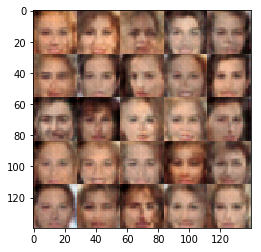

Epoch 1/1... Discriminator Loss: 1.6654... Generator Loss: 0.3765
Epoch 1/1... Discriminator Loss: 1.6257... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 0.3923
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.4010
Epoch 1/1... Discriminator Loss: 1.6272... Generator Loss: 0.4014
Epoch 1/1... Discriminator Loss: 1.6167... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 1.6651... Generator Loss: 0.3804
Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.4011
Epoch 1/1... Discriminator Loss: 1.5796... Generator Loss: 0.4269
Epoch 1/1... Discriminator Loss: 1.6504... Generator Loss: 0.3957


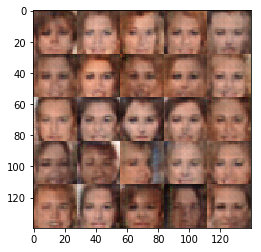

Epoch 1/1... Discriminator Loss: 1.6391... Generator Loss: 0.4122
Epoch 1/1... Discriminator Loss: 1.6489... Generator Loss: 0.3889
Epoch 1/1... Discriminator Loss: 1.6147... Generator Loss: 0.4331
Epoch 1/1... Discriminator Loss: 1.6134... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.6327... Generator Loss: 0.4604
Epoch 1/1... Discriminator Loss: 1.6346... Generator Loss: 0.4130
Epoch 1/1... Discriminator Loss: 1.6161... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.6688... Generator Loss: 0.4101
Epoch 1/1... Discriminator Loss: 1.6077... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 1.6214... Generator Loss: 0.4012


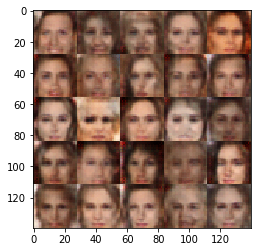

Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.4108
Epoch 1/1... Discriminator Loss: 1.6399... Generator Loss: 0.4039
Epoch 1/1... Discriminator Loss: 1.6052... Generator Loss: 0.4387
Epoch 1/1... Discriminator Loss: 1.6577... Generator Loss: 0.3882
Epoch 1/1... Discriminator Loss: 1.5667... Generator Loss: 0.4474
Epoch 1/1... Discriminator Loss: 1.5986... Generator Loss: 0.4185
Epoch 1/1... Discriminator Loss: 1.6347... Generator Loss: 0.4131
Epoch 1/1... Discriminator Loss: 1.6211... Generator Loss: 0.4252
Epoch 1/1... Discriminator Loss: 1.6335... Generator Loss: 0.4093
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.4133


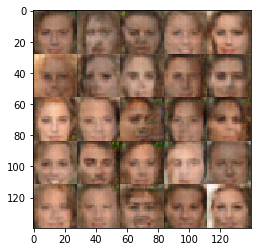

Epoch 1/1... Discriminator Loss: 1.6299... Generator Loss: 0.4100
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 0.4138
Epoch 1/1... Discriminator Loss: 1.6329... Generator Loss: 0.4366
Epoch 1/1... Discriminator Loss: 1.6265... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.6342... Generator Loss: 0.4049
Epoch 1/1... Discriminator Loss: 1.6429... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.4009
Epoch 1/1... Discriminator Loss: 1.6339... Generator Loss: 0.4104
Epoch 1/1... Discriminator Loss: 1.5911... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.6453... Generator Loss: 0.3949


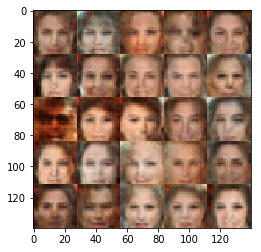

Epoch 1/1... Discriminator Loss: 1.6503... Generator Loss: 0.3973
Epoch 1/1... Discriminator Loss: 1.6405... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.4025
Epoch 1/1... Discriminator Loss: 1.6392... Generator Loss: 0.3903
Epoch 1/1... Discriminator Loss: 1.6469... Generator Loss: 0.4035
Epoch 1/1... Discriminator Loss: 1.6284... Generator Loss: 0.4137
Epoch 1/1... Discriminator Loss: 1.6624... Generator Loss: 0.3910
Epoch 1/1... Discriminator Loss: 1.6267... Generator Loss: 0.4146
Epoch 1/1... Discriminator Loss: 1.6311... Generator Loss: 0.4121
Epoch 1/1... Discriminator Loss: 1.6454... Generator Loss: 0.3952


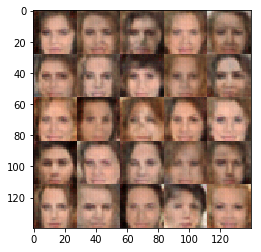

Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.4071
Epoch 1/1... Discriminator Loss: 1.6514... Generator Loss: 0.3844
Epoch 1/1... Discriminator Loss: 1.6386... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.6683... Generator Loss: 0.3919
Epoch 1/1... Discriminator Loss: 1.6373... Generator Loss: 0.4011
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 0.3928
Epoch 1/1... Discriminator Loss: 1.6338... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.6561... Generator Loss: 0.3876
Epoch 1/1... Discriminator Loss: 1.6343... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.6676... Generator Loss: 0.3754


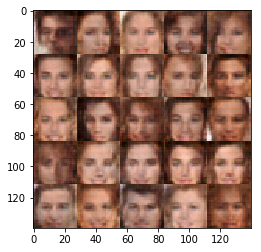

Epoch 1/1... Discriminator Loss: 1.6254... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.6556... Generator Loss: 0.3892
Epoch 1/1... Discriminator Loss: 1.6570... Generator Loss: 0.3886
Epoch 1/1... Discriminator Loss: 1.6146... Generator Loss: 0.4170
Epoch 1/1... Discriminator Loss: 1.6089... Generator Loss: 0.4242
Epoch 1/1... Discriminator Loss: 1.6783... Generator Loss: 0.3717
Epoch 1/1... Discriminator Loss: 1.6311... Generator Loss: 0.4049
Epoch 1/1... Discriminator Loss: 1.6353... Generator Loss: 0.4050
Epoch 1/1... Discriminator Loss: 1.6625... Generator Loss: 0.3910
Epoch 1/1... Discriminator Loss: 1.6132... Generator Loss: 0.4196


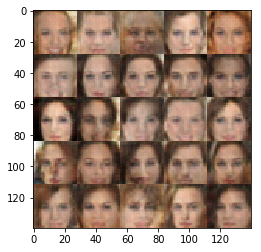

Epoch 1/1... Discriminator Loss: 1.6412... Generator Loss: 0.3895
Epoch 1/1... Discriminator Loss: 1.6159... Generator Loss: 0.4289
Epoch 1/1... Discriminator Loss: 1.6253... Generator Loss: 0.4062
Epoch 1/1... Discriminator Loss: 1.6505... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.6153... Generator Loss: 0.4193
Epoch 1/1... Discriminator Loss: 1.6501... Generator Loss: 0.3943
Epoch 1/1... Discriminator Loss: 1.6581... Generator Loss: 0.3847
Epoch 1/1... Discriminator Loss: 1.6324... Generator Loss: 0.4305
Epoch 1/1... Discriminator Loss: 1.6515... Generator Loss: 0.3933
Epoch 1/1... Discriminator Loss: 1.6705... Generator Loss: 0.3839


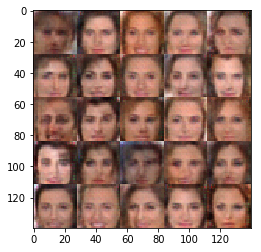

Epoch 1/1... Discriminator Loss: 1.6542... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.5992... Generator Loss: 0.4206
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.3954
Epoch 1/1... Discriminator Loss: 1.6586... Generator Loss: 0.3891
Epoch 1/1... Discriminator Loss: 1.6269... Generator Loss: 0.4200
Epoch 1/1... Discriminator Loss: 1.6444... Generator Loss: 0.4048
Epoch 1/1... Discriminator Loss: 1.6437... Generator Loss: 0.4083
Epoch 1/1... Discriminator Loss: 1.6390... Generator Loss: 0.4143
Epoch 1/1... Discriminator Loss: 1.6251... Generator Loss: 0.4040
Epoch 1/1... Discriminator Loss: 1.6495... Generator Loss: 0.4178


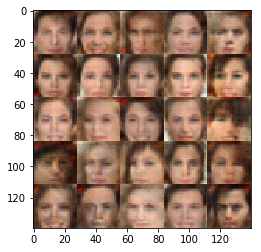

Epoch 1/1... Discriminator Loss: 1.6425... Generator Loss: 0.4073
Epoch 1/1... Discriminator Loss: 1.6602... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.6293... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.5944... Generator Loss: 0.4308
Epoch 1/1... Discriminator Loss: 1.6798... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.6387... Generator Loss: 0.4059
Epoch 1/1... Discriminator Loss: 1.6591... Generator Loss: 0.3817
Epoch 1/1... Discriminator Loss: 1.6601... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 1.6445... Generator Loss: 0.4038
Epoch 1/1... Discriminator Loss: 1.6594... Generator Loss: 0.3921


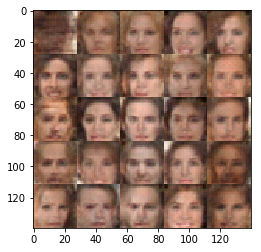

Epoch 1/1... Discriminator Loss: 1.6017... Generator Loss: 0.4184
Epoch 1/1... Discriminator Loss: 1.6382... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.6463... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 1.6203... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.6183... Generator Loss: 0.4075
Epoch 1/1... Discriminator Loss: 1.5991... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.6650... Generator Loss: 0.4131
Epoch 1/1... Discriminator Loss: 1.6399... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 1.6218... Generator Loss: 0.4054
Epoch 1/1... Discriminator Loss: 1.6657... Generator Loss: 0.3778


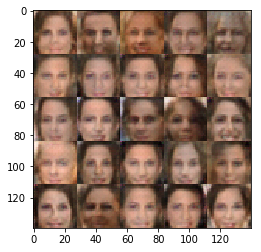

Epoch 1/1... Discriminator Loss: 1.6453... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.4052
Epoch 1/1... Discriminator Loss: 1.6595... Generator Loss: 0.4005
Epoch 1/1... Discriminator Loss: 1.6516... Generator Loss: 0.4530
Epoch 1/1... Discriminator Loss: 1.6254... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.6677... Generator Loss: 0.3920
Epoch 1/1... Discriminator Loss: 1.6658... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.6542... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.6589... Generator Loss: 0.3872
Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.4129


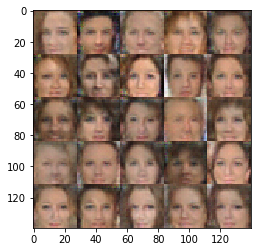

Epoch 1/1... Discriminator Loss: 1.6356... Generator Loss: 0.4135
Epoch 1/1... Discriminator Loss: 1.6589... Generator Loss: 0.3947
Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.3964
Epoch 1/1... Discriminator Loss: 1.6436... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.6186... Generator Loss: 0.4164
Epoch 1/1... Discriminator Loss: 1.6463... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 1.6425... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.6579... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 1.6198... Generator Loss: 0.4137
Epoch 1/1... Discriminator Loss: 1.5689... Generator Loss: 0.4517


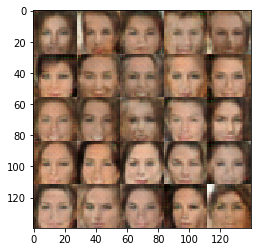

Epoch 1/1... Discriminator Loss: 1.6441... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.6445... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 1.6447... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.6527... Generator Loss: 0.3832
Epoch 1/1... Discriminator Loss: 1.5980... Generator Loss: 0.4150
Epoch 1/1... Discriminator Loss: 1.6925... Generator Loss: 0.4693
Epoch 1/1... Discriminator Loss: 1.6606... Generator Loss: 0.3974
Epoch 1/1... Discriminator Loss: 1.6325... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 1.6228... Generator Loss: 0.4162
Epoch 1/1... Discriminator Loss: 1.6344... Generator Loss: 0.4177


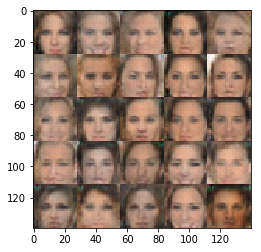

Epoch 1/1... Discriminator Loss: 1.6313... Generator Loss: 0.4055
Epoch 1/1... Discriminator Loss: 1.6267... Generator Loss: 0.4201
Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 0.3874
Epoch 1/1... Discriminator Loss: 1.5964... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.6476... Generator Loss: 0.3969
Epoch 1/1... Discriminator Loss: 1.6532... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 1.6393... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 1.6368... Generator Loss: 0.4067
Epoch 1/1... Discriminator Loss: 1.6391... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 1.6412... Generator Loss: 0.3936


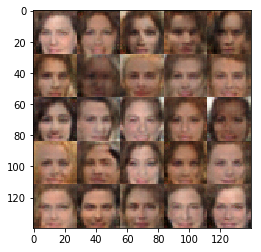

Epoch 1/1... Discriminator Loss: 1.6246... Generator Loss: 0.3999
Epoch 1/1... Discriminator Loss: 1.6537... Generator Loss: 0.3974
Epoch 1/1... Discriminator Loss: 1.6405... Generator Loss: 0.4007


In [27]:
batch_size = 32
z_dim = 250
learning_rate = 0.0005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.